# Comparisons between ADCIRC, DG, and ADC-DG coupling

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import sys
np.set_printoptions(linewidth=sys.maxsize)
import os
from utils_beach import *
import shutil
import seaborn as sns
from datetime import datetime, timedelta


sns.set_style("ticks")
sns.set_palette("deep")
sns.set_context("notebook")
#shutil.rmtree(matplotlib.get_cachedir())
matplotlib.rcParams.update({'font.size': 15})
#matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Inter']})
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
matplotlib.rc('text', usetex=False)


## Coarse Mesh

Text(0.5, 1.0, 'Neches River at Beaumont')

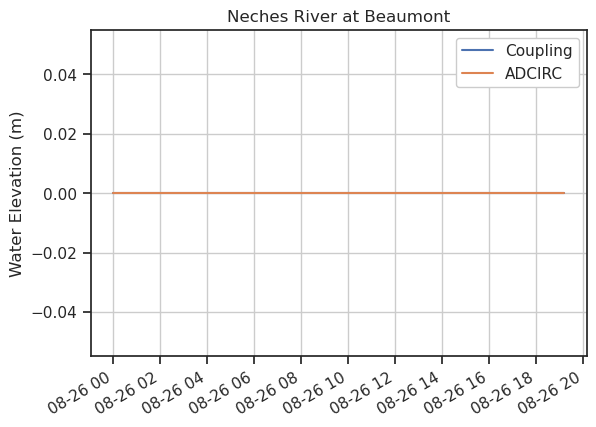

In [25]:
root = 'coarse/'

gauge = 4
t,e = getStation(root + 'fort.61.coupling.rk5', gauge)
t2,e2 = getStation(root + 'fort.61.adc', gauge)
runday = 0.8

#e = e[::10]

start = datetime(2017,8,26,0,0)
end = start + timedelta(days=runday)

elev = pd.DataFrame({'Coupling': e})
elev2 = pd.DataFrame({'ADCIRC': e2})

elev.index = pd.DatetimeIndex(pd.date_range(start, end, periods=len(elev)))
elev2.index = pd.DatetimeIndex(pd.date_range(start, end, periods=len(elev2)))

f, ax = plt.subplots(1, 1)

elev.loc[start:end, "Coupling"].plot(ax=ax)
elev2.loc[start:end, "ADCIRC"].plot(ax=ax)

plt.grid()

plt.legend(framealpha=1)
plt.ylabel("Water Elevation (m)")
plt.xticks(rotation=30)
plt.title('Neches River at Beaumont')

## Quarter Annular Flat

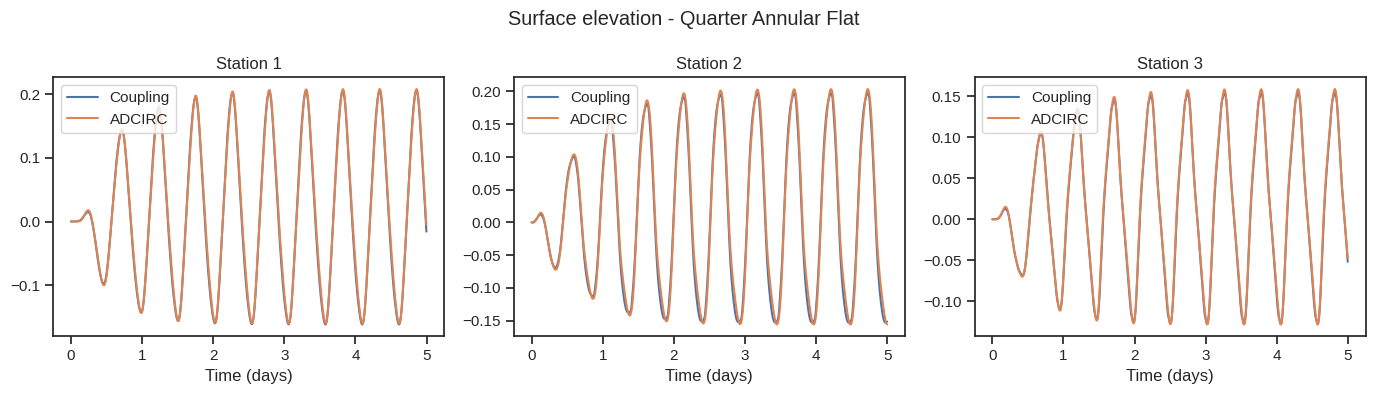

In [54]:
st = 1
nstae = 3
root = '/workspace/adcirc-cg/continuity_tests/QuarterAnnularFlat/'

sns.set_style("ticks")
sns.set_palette("deep")
sns.set_context("notebook")
plt.rc('font',**{'family':'sans-serif','sans-serif':['Liberation Sans']})

f = plt.figure(figsize=(14,4))
for i in range(1,nstae+1):
    t1, e1 = getStation(root + 'fort.61.adg', i)
    t2, e2 = getStation(root + 'fort.61.adc', i)
    
    
    plt.subplot(130+i)
    plt.plot(t1,e1, label='Coupling')
    plt.plot(t2,e2, label='ADCIRC')

    plt.legend()
    plt.xlabel('Time (days)')
    plt.title('Station %d' % i)

plt.suptitle('Surface elevation - Quarter Annular Flat')
plt.tight_layout()

## Lynch and Gray

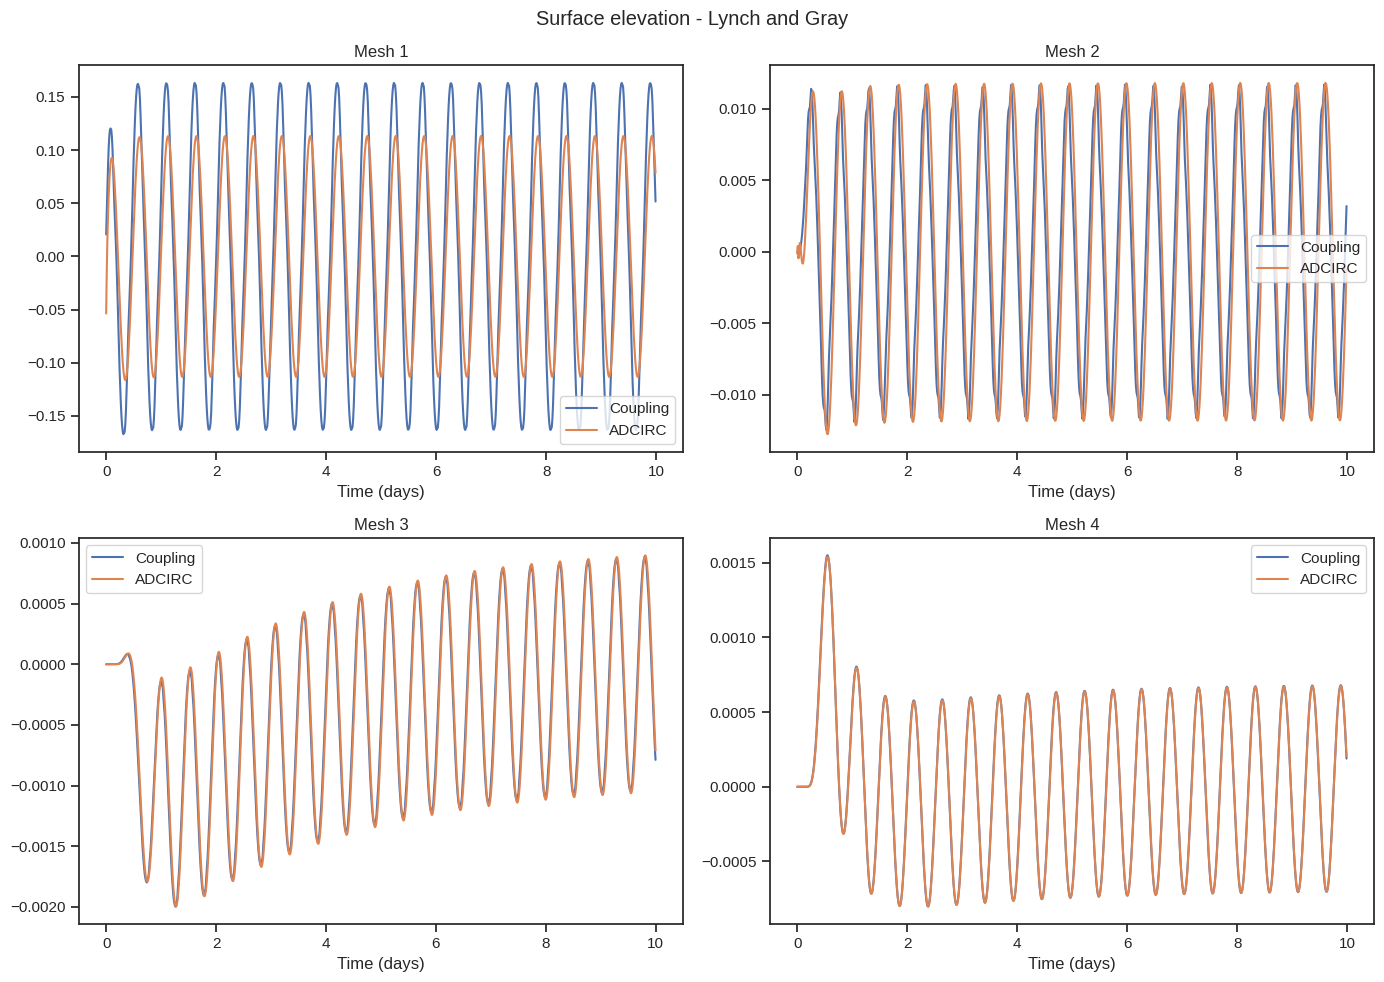

In [119]:
st = 1

root = '/workspace/adcirc-cg/continuity_tests/LynchGray/'

# t4, v1 = getStation(root + 'fort.62.coupling', st)
# t5, v2 = getStation(root + 'fort.62.adc', st)
# t4, v3 = getStation(root + 'fort.62.dg', st)
sns.set_style("ticks")
sns.set_palette("deep")
sns.set_context("notebook")
plt.rc('font',**{'family':'sans-serif','sans-serif':['Liberation Sans']})

f = plt.figure(figsize=(14,10))
t2, e2 = getStation(root + 'Mesh4/fort.61.adc', 1)

for i in range(1,5):
    t1, e1 = getStation(root + 'Mesh' + str(i) + '/fort.61.coupling', 1)
    #t3, e3 = getStation(root + 'Mesh' + str(i) + '/fort.61.hot', 1)
    t4, e4 = getStation(root + 'Mesh' + str(i) + '/fort.61.adc', 1)
    #t5, e5 = getStation(root + 'Mesh' + str(i) + '/fort.61.dg', 1)


    plt.subplot(220 + i)
    plt.plot(t1,e1, label='Coupling')
    #plt.plot(t3,e3, label='Hotstart')
    plt.plot(t4,e4, label='ADCIRC')
    #plt.plot(t5,e5, label='DG-SWEM')
    #plt.ylim([-8e-4, 8e-4])


    #plt.plot(t2,e2, label='Exact Solution')
    plt.legend()
    plt.xlabel('Time (days)')
    plt.title('Mesh %d' % i)


plt.suptitle('Surface elevation - Lynch and Gray')
plt.tight_layout()





In [48]:
f.savefig('/workspace/adcirc-cg/continuity_tests/LynchGray/mesh1.png', dpi=300, bbox_inches='tight')

## Quarter Annular

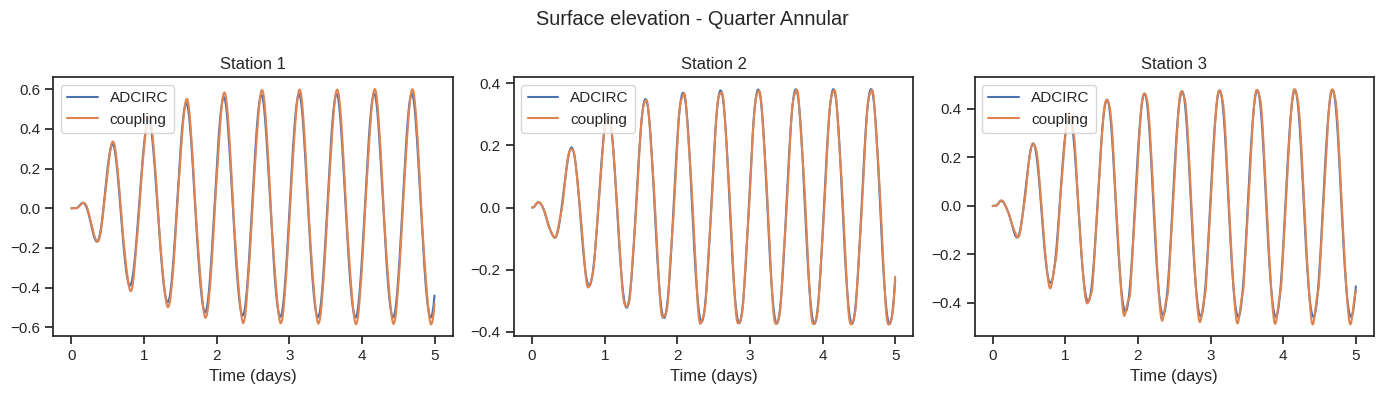

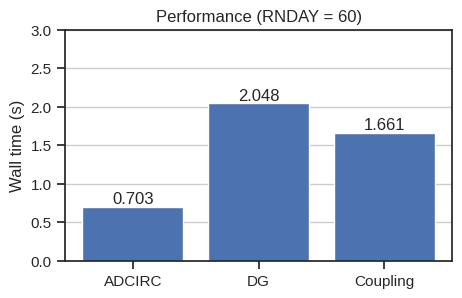

In [20]:
st = 1
nstae = 3
#root = './continuity_tests/QuarterAnnular/'
root = os.getcwd() + '/QuarterAnnular/'
#r#oot = '/home/namo/Programs/adcirc-cg/continuity_tests/QuarterAnnular/'

# t4, v1 = getStation(root + 'fort.62.coupling', st)
# t5, v2 = getStation(root + 'fort.62.adc', st)
# t4, v3 = getStation(root + 'fort.62.dg', st)
sns.set_style("ticks")
sns.set_palette("deep")
sns.set_context("notebook")
plt.rc('font',**{'family':'sans-serif','sans-serif':['Liberation Sans']})

f = plt.figure(figsize=(14,4))
for i in range(1,nstae+1):
    t1, e1 = getStation(root + 'fort.61.coupling', i)
    t2, e2 = getStation(root + 'fort.61.adc', i)
    #t3, e3 = getStation(root + 'fort.61.dg', i)
    #t4, e4 = getStation(root + 'fort.61.cuda', i)
    t5,e5 = getStation(root + 'fort.61.p0', i)

    
    plt.subplot(130+i)
    plt.plot(t2,e2, label='ADCIRC')
    plt.plot(t1,e1, label='coupling')
    #plt.plot(t5,e5, label='p = 0')

    #plt.plot(t3,e3, label='DGSWEM')
    #plt.plot(t4,e4, label='CUDA')


    plt.legend()
    plt.xlabel('Time (days)')
    plt.title('Station %d' % i)


plt.suptitle('Surface elevation - Quarter Annular')
plt.tight_layout()

# plt.subplot(122)
# plt.plot(t1,v1, label='couling')
# plt.plot(t2,v2, label='ADCIRC')
# plt.plot(t3,v3, label='DG')
# plt.title('Velocity')

f2 = plt.figure(figsize=(5,3))
progs = ['ADCIRC', 'DG', 'Coupling']
#wtime = [2.269, 11.348, 9.245]
wtime = [0.703, 2.048, 1.661]
bars = plt.bar(progs, wtime)
plt.bar_label(bars)
plt.title('Performance (RNDAY = 60)')
plt.ylabel('Wall time (s)')
plt.ylim(0,3)
plt.grid(axis='y')

In [37]:
f.savefig('/workspace/adcirc-cg/continuity_tests/Shinnecock/stationPlots.png', dpi=300, bbox_inches='tight')

## Shinnecock Inlet

"\nf2 = plt.figure(figsize=(5,3))\nprogs = ['ADCIRC', 'DG', 'Coupling']\n#wtime = [2.269, 11.348, 9.245]\nwtime = [14.08, 37.76, 21.63 ]\nbars = plt.bar(progs, wtime)\nplt.bar_label(bars)\nplt.title('Performance (RNDAY = 60)')\nplt.ylabel('Wall time (s)')\nplt.ylim(0,max(wtime)+3)\nplt.grid(axis='y')\n"

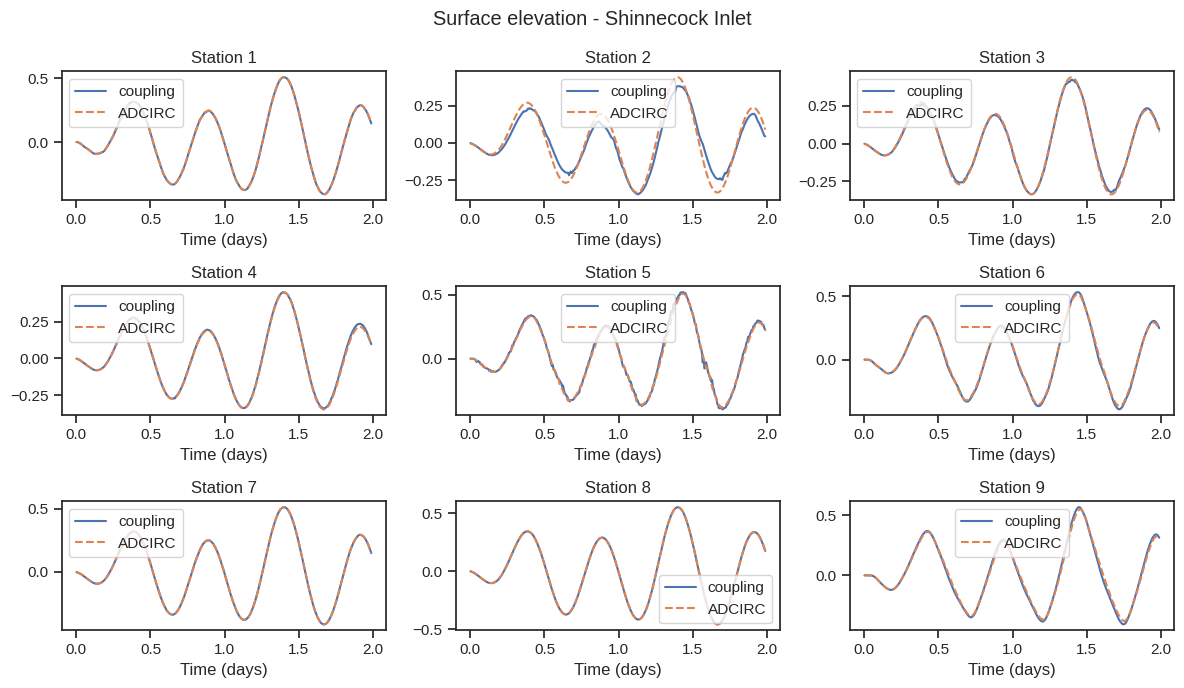

In [9]:
st = 1
nstae = 9
root = '/workspace/adcirc-dg-tests/shinnecock/'

# t4, v1 = getStation(root + 'fort.62.coupling', st)
# t5, v2 = getStation(root + 'fort.62.adc', st)
# t4, v3 = getStation(root + 'fort.62.dg', st)
sns.set_style("ticks")
sns.set_palette("deep")
sns.set_context("notebook")
plt.rc('font',**{'family':'sans-serif','sans-serif':['Liberation Sans']})

f = plt.figure(figsize=(12,7))
for i in range(1,nstae+1):
    t1, e1 = getStation(root + 'fort.61.adg', i)
    t2, e2 = getStation(root + 'fort.61.adc', i)
    #t3, e3 = getStation(root + 'fort.61.cuda', i)
    
    plt.subplot(330+i)
    plt.plot(t1,e1, label='coupling')
    plt.plot(t2,e2, '--', label='ADCIRC')
    #plt.plot(t3,e3, label='CUDA')

    plt.legend()
    plt.xlabel('Time (days)')
    plt.title('Station %d' % i)


plt.suptitle('Surface elevation - Shinnecock Inlet')
plt.tight_layout()

# plt.subplot(122)
# plt.plot(t1,v1, label='couling')
# plt.plot(t2,v2, label='ADCIRC')
# plt.plot(t3,v3, label='DG')
# plt.title('Velocity')
'''
f2 = plt.figure(figsize=(5,3))
progs = ['ADCIRC', 'DG', 'Coupling']
#wtime = [2.269, 11.348, 9.245]
wtime = [14.08, 37.76, 21.63 ]
bars = plt.bar(progs, wtime)
plt.bar_label(bars)
plt.title('Performance (RNDAY = 60)')
plt.ylabel('Wall time (s)')
plt.ylim(0,max(wtime)+3)
plt.grid(axis='y')
'''

In [5]:
f.savefig('/workspace/adcirc-cg/continuity_tests/Shinnecock/modal_vel.png', bbox_inches='tight',dpi=300)

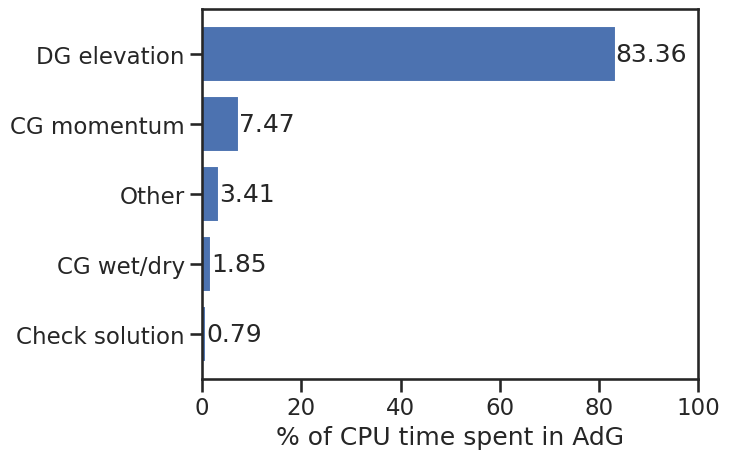

In [98]:
sns.set_style("ticks")
sns.set_palette("deep")
sns.set_context("talk")
fig, ax = plt.subplots()

# Example data
people = ('DG elevation', 'CG momentum', 'Other', 'CG wet/dry', 'Check solution')
y_pos = np.arange(len(people))
performance = [83.36, 7.47, 3.41, 1.85, 0.79]


bars = ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people)
ax.bar_label(bars)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% of CPU time spent in AdG')
ax.set_xlim([0, 100])
#ax.set_title('How fast do you want to go today?')

plt.show()

In [99]:
fig.savefig('/workspace/Proposal/gprof_time.jpg', bbox_inches='tight',dpi=300)

## Rain Tub

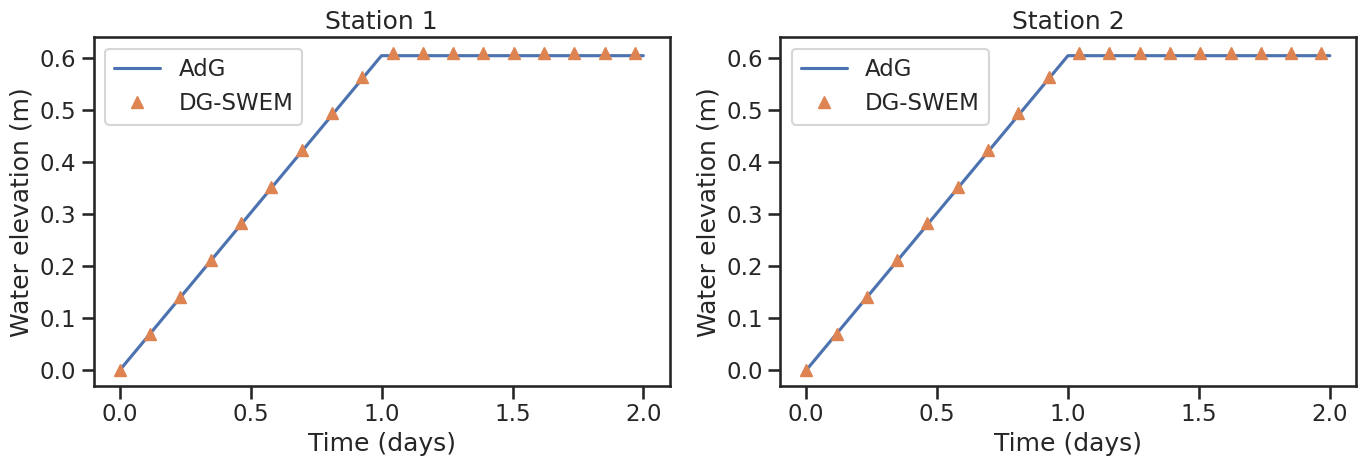

In [131]:
sns.set_style("ticks")
sns.set_palette("deep")
sns.set_context("talk")

st = 1
nstae = 2
root = '/workspace/adcirc-cg/continuity_tests/Tub/'

# t4, v1 = getStation(root + 'fort.62.coupling', st)
# t5, v2 = getStation(root + 'fort.62.adc', st)
# t4, v3 = getStation(root + 'fort.62.dg', st)


f = plt.figure(figsize=(14,5))
for i in range(1,nstae+1):
    t1, e1 = getStation(root + 'fort.61.coupling', i)
    #t2, e2 = getStation(root + 'fort.61.adc', i)
    t3, e3 = getStation(root + 'fort.61.dg', i)
    
    plt.subplot(120+i)
    plt.plot(t1,e1, label='AdG')
    #plt.plot(t2,e2, label='ADCIRC')
    plt.plot(t3[::200],e3[::200], '^',label='DG-SWEM')

    plt.legend()
    plt.xlabel('Time (days)')
    plt.title('Station %d' % i)

    plt.ylabel('Water elevation (m)')
#plt.suptitle('Surface elevation - Still water with 1-day rain')
plt.tight_layout()


In [132]:
f.savefig('/workspace/Proposal/tub.jpg', dpi=300)

## 1D Channel

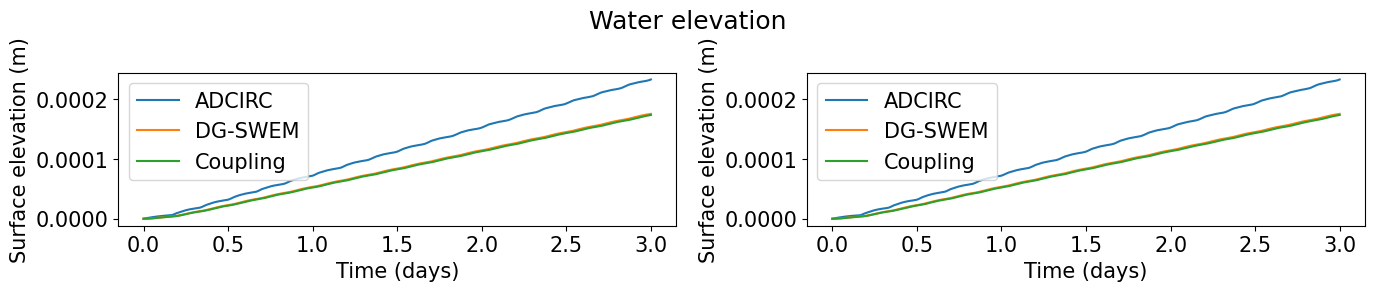

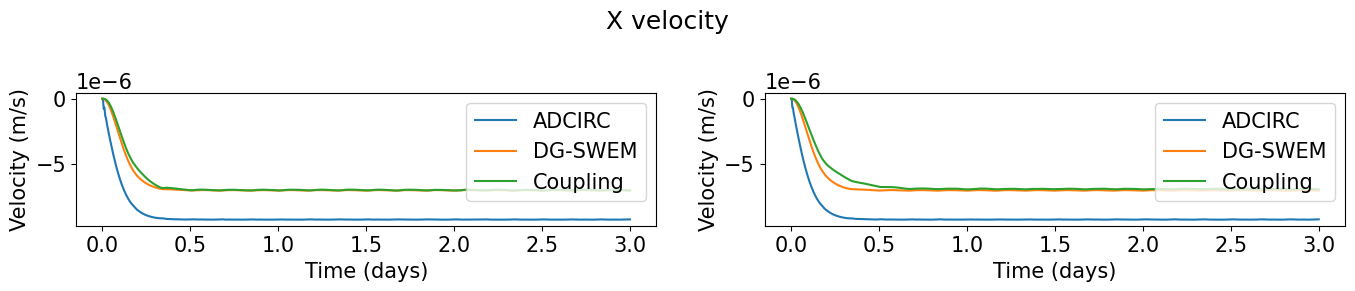

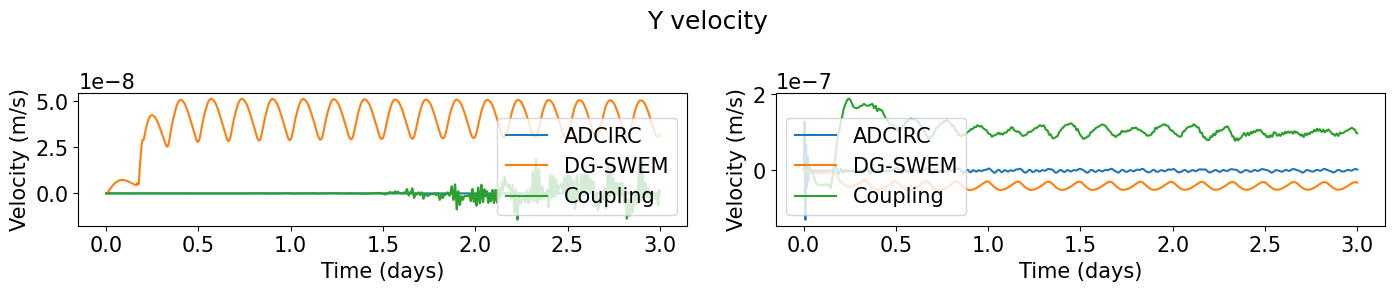

In [13]:
root = '1D-Channel/'
nstae = 2
figsize = (14,3)

fig1, ax = plt.subplots(1,2, figsize=figsize)

for i in range(nstae):
    t1, e1 = getStation(root + 'fort.61.adc', i+1)
    t2, e2 = getStation(root + 'fort.61.dg', i+1)
    t3, e3 = getStation(root + 'fort.61.coupling', i+1)
    
    
    ax[i].plot(t1,e1, label='ADCIRC')
    ax[i].plot(t2,e2, label='DG-SWEM')
    ax[i].plot(t3,e3, label='Coupling')

    ax[i].legend()
    ax[i].set_xlabel('Time (days)')
    ax[i].set_ylabel('Surface elevation (m)')
    
fig1.suptitle('Water elevation')
plt.tight_layout()


fig2, ax = plt.subplots(1,2, figsize=figsize)
for i in range(nstae):
    t1, v1 = getStation(root + 'fort.62.adc', i+1)
    t2, v2 = getStation(root + 'fort.62.dg', i+1)
    t3, v3 = getStation(root + 'fort.62.coupling', i+1)
    
    
    ax[i].plot(t1,v1, label='ADCIRC')
    ax[i].plot(t2,v2, label='DG-SWEM')
    ax[i].plot(t3,v3, label='Coupling')

    ax[i].legend()
    ax[i].set_xlabel('Time (days)')
    ax[i].set_ylabel('Velocity (m/s)')

#plt.suptitle('Surface elevation - Neches')
fig2.suptitle('X velocity')
plt.tight_layout()


fig3, ax = plt.subplots(1,2, figsize=figsize)
for i in range(nstae):
    t1, v1 = getStation(root + 'fort.62.adc', i+1, comp=2)
    t2, v2 = getStation(root + 'fort.62.dg', i+1, comp=2)
    t3, v3 = getStation(root + 'fort.62.coupling', i+1, comp=2)
    
    
    ax[i].plot(t1,v1, label='ADCIRC')
    ax[i].plot(t2,v2, label='DG-SWEM')
    ax[i].plot(t3,v3, label='Coupling')

    ax[i].legend()
    ax[i].set_xlabel('Time (days)')
    ax[i].set_ylabel('Velocity (m/s)')

#plt.suptitle('Surface elevation - Neches')
fig3.suptitle('Y velocity')
plt.tight_layout()


In [9]:
fig1.savefig('1D-Channel/elev_v1.png', dpi=300)
fig2.savefig('1D-Channel/velx_v1.png', dpi=300)
fig3.savefig('1D-Channel/vely_v1.png', dpi=300)

In [99]:
f.savefig('y-vel.png', dpi=300)

## APES


In [53]:
plot_main("APES/maxele.63.coupling.nc", show_edges=False, mode="maxele", clim=[-0.1,0.05])

1


Widget(value="<iframe src='http://localhost:44219/index.html?ui=P_0x7fc4cc0f9dd0_48&reconnect=auto' style='wid…

In [52]:
plot_main("APES/maxele.63.adc.nc", show_edges=False, mode="maxele", clim=[-0.1,0.05])

1


Widget(value="<iframe src='http://localhost:44219/index.html?ui=P_0x7fc4730b88d0_47&reconnect=auto' style='wid…

In [37]:
plot_main("APES/fort.63.coupling.nc", show_edges=False, mode="63", frame=1210, clim=[-0.1,0.1])

1440


Widget(value="<iframe src='http://localhost:44219/index.html?ui=P_0x7fc38f6ce550_33&reconnect=auto' style='wid…

In [49]:
plot_main("APES/fort.64.coupling.nc", show_edges=False, mode="64", frame=130, clim=[-0.1,0.1])

144


Widget(value="<iframe src='http://localhost:44219/index.html?ui=P_0x7fc3432d9810_44&reconnect=auto' style='wid…

In [34]:
plot_main("APES/fort.64.adc.nc", show_edges=False, mode="64", clim=[-0.1,0.1], frame=320)

360


Widget(value="<iframe src='http://localhost:44219/index.html?ui=P_0x7fc38f6b8810_30&reconnect=auto' style='wid…

## Ike

1224
2.6461295395580793


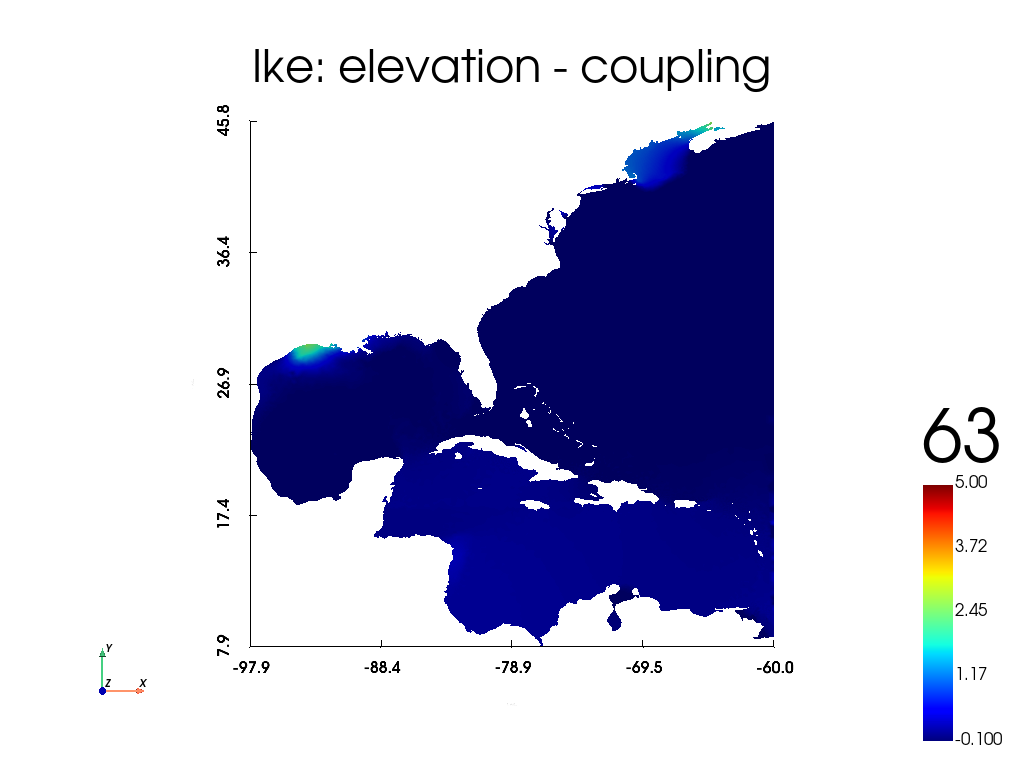

In [63]:
region=[-80,-51.9,10,43]
frame = 1100
plotter = plot_main("Ike/fort.63.coupling.nc", title="Ike: elevation - coupling", show_edges=False, mode="63", frame=frame, clim=[-0.1,5])

1224
2.6694187364356208


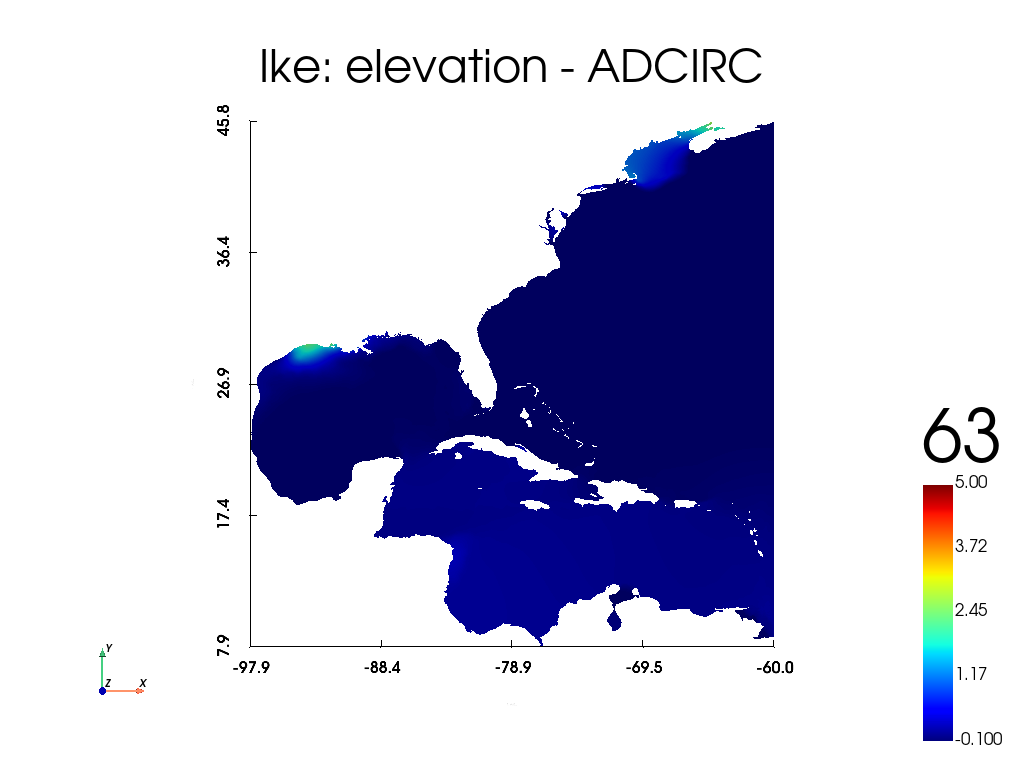

In [64]:
plotter = plot_main("Ike/fort.63.adc.nc", title="Ike: elevation - ADCIRC", show_edges=False, mode="63", frame=frame, clim=[-0.1,5])

ValueError: num must be an integer with 1 <= num <= 3, not 4

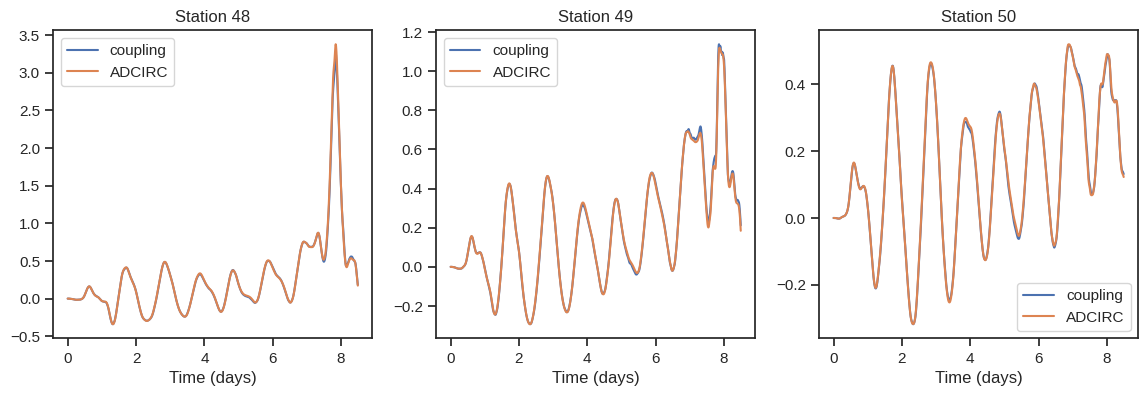

In [103]:
t = 1
nstae = 3
start = 48
root = '/workspace/adcirc-cg/continuity_tests/Ike/'

# t4, v1 = getStation(root + 'fort.62.coupling', st)
# t5, v2 = getStation(root + 'fort.62.adc', st)
# t4, v3 = getStation(root + 'fort.62.dg', st)
sns.set_style("ticks")
sns.set_palette("deep")
sns.set_context("notebook")
plt.rc('font',**{'family':'sans-serif','sans-serif':['Liberation Sans']})

f = plt.figure(figsize=(14,4))
for i in range(start,start+nstae+1):
    t1, e1 = getStation(root + 'fort.61.coupling', i)
    t2, e2 = getStation(root + 'fort.61.adc', i)
    #t3, e3 = getStation(root + 'fort.61.dg', i)
    #t4, e4 = getStation(root + 'fort.61.cuda', i)

    
    plt.subplot(130+i-start+1)
    plt.plot(t1,e1, label='coupling')
    plt.plot(t2,e2, label='ADCIRC')
    #plt.plot(t3,e3, label='DGSWEM')
    #plt.plot(t4,e4, label='CUDA')


    plt.legend()
    plt.xlabel('Time (days)')
    plt.title('Station %d' % i)

plt.suptitle('Surface elevation - Ike')
plt.tight_layout()


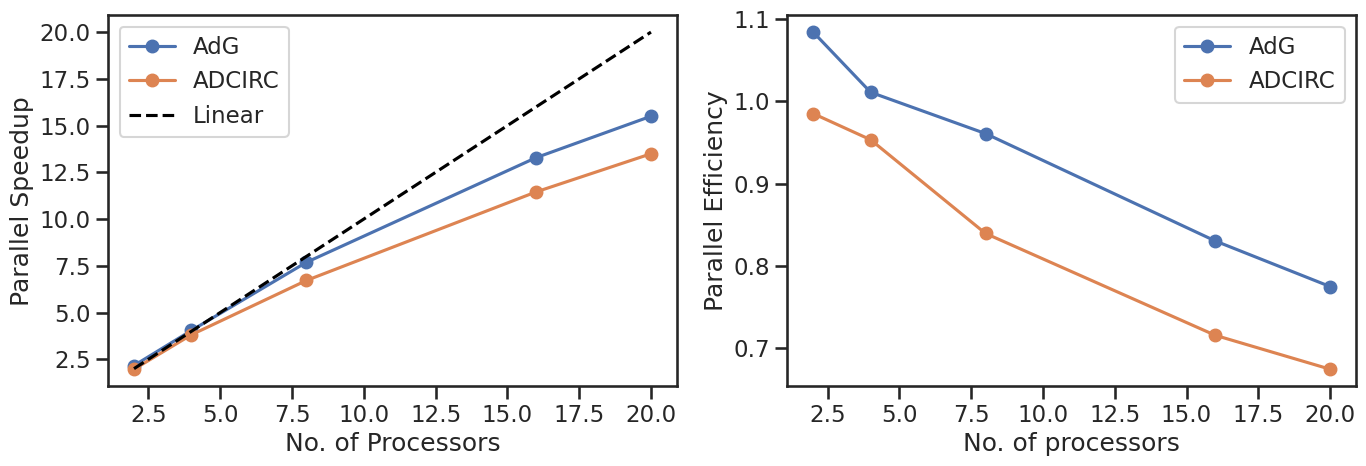

In [179]:
wtime = np.array([14*60+18, 460, 242., 140, 120])
cores = np.array([2, 4, 8, 16, 20])
npc = [31435. / c for c in cores]
stime = 31*60.
speedup = stime / wtime
eff = [s / p for s,p in zip(speedup, cores)]

at = 60.*9+51
atime = np.array([5*60, 155, 60+28., 51.6, 43.8])
s2 = at / atime
eff2 = [s / p for s,p in zip(s2, cores)]



f = plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(cores, speedup, '-o', label='AdG')
plt.plot(cores, s2, '-o', label='ADCIRC')
plt.plot(np.linspace(2,20,10), np.linspace(2,20,10), 'k--', label='Linear')
plt.xlabel('No. of Processors')
plt.ylabel('Parallel Speedup')

plt.legend()

plt.subplot(122)
plt.plot(cores, eff, '-o', label='AdG')
plt.plot(cores, eff2, '-o', label='ADCIRC')
plt.legend()

plt.xlabel('No. of processors')
plt.ylabel('Parallel Efficiency')


plt.tight_layout()


In [177]:
f.savefig('/workspace/Proposal/scaling.jpg', dpi=300)

## Isabel

In [4]:
region=[-80,-51.9,10,43]
frame = 10

1224
0.018582519312844388


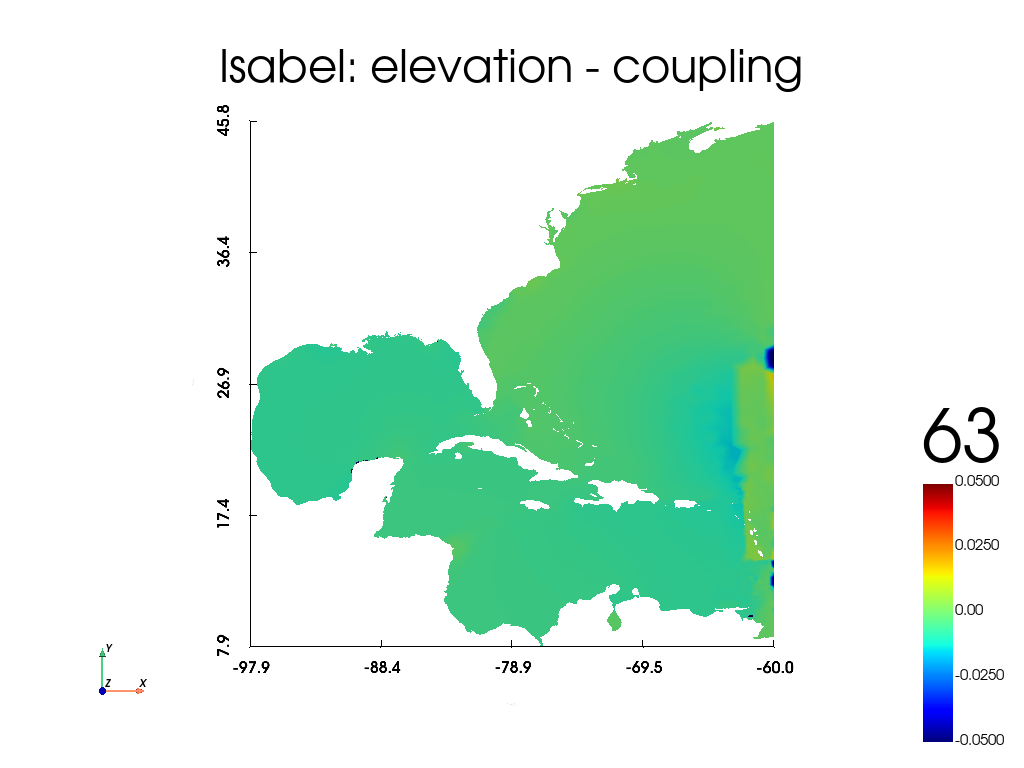

In [13]:
plotter = plot_main("Isabel/fort.63.coupling.nc", title="Isabel: elevation - coupling", show_edges=False, mode="63", frame=100, clim=[-0.05,0.05])

144
0.01843212124449562


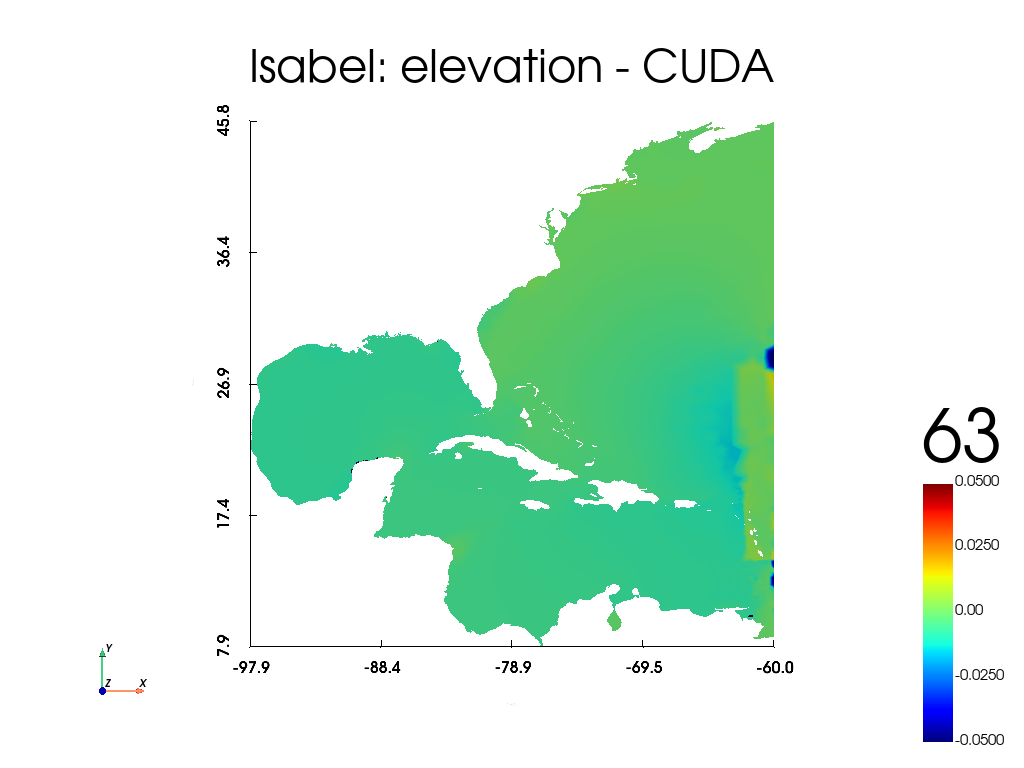

In [12]:
plotter = plot_main("Isabel/fort.63.cuda.nc", title="Isabel: elevation - CUDA", show_edges=False, mode="63", frame=100, clim=[-0.05,0.05])

In [57]:
#plotter.save_graphic("Isabel/coupling.pdf")
plotter.screenshot("Isabel/coupling.png", return_img=False)

1224
0.3798537888757139


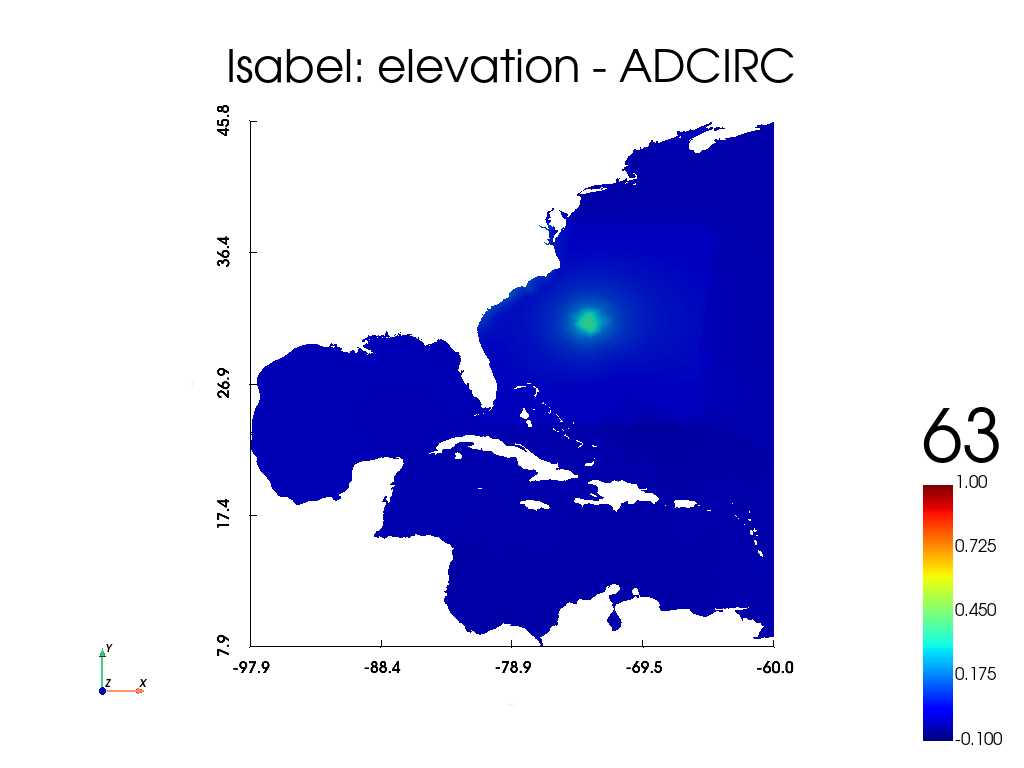

In [22]:
plotter = plot_main("Isabel/fort.63.adc.nc", title="Isabel: elevation - ADCIRC", show_edges=False, mode="63", frame=frame, clim=[-0.1,1])

In [60]:
plotter.screenshot("Isabel/adcirc.png", return_img=False)

In [57]:
plot_main("Isabel/maxvel.63.coupling.nc", show_edges=False, mode="maxvel", clim=[-0.1,1])

1


Widget(value="<iframe src='http://localhost:44219/index.html?ui=P_0x7fc322f808d0_51&reconnect=auto' style='wid…

### Isabel - performance

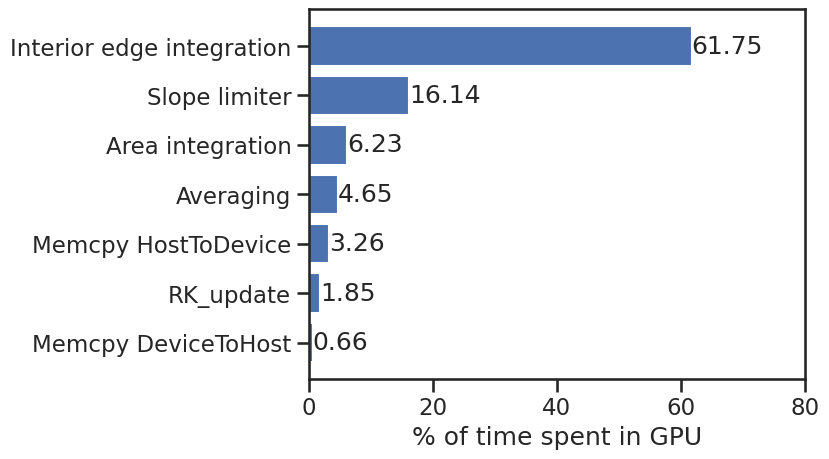

In [94]:
sns.set_style("ticks")
sns.set_palette("deep")
sns.set_context("talk")
fig, ax = plt.subplots()

# Example data
people = ('Interior edge integration', 'Slope limiter', 'Area integration', 'Averaging', 'Memcpy HostToDevice', 'RK_update', 'Memcpy DeviceToHost')
y_pos = np.arange(len(people))
performance = [61.75, 16.14, 6.23, 4.65, 3.26, 1.85, 0.66]


bars = ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people)
ax.bar_label(bars)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('% of time spent in GPU')
ax.set_xlim([0, 80])
#ax.set_title('How fast do you want to go today?')

plt.show()

In [95]:
fig.savefig('/workspace/Proposal/nvprof_time.jpg', bbox_inches='tight',dpi=300)

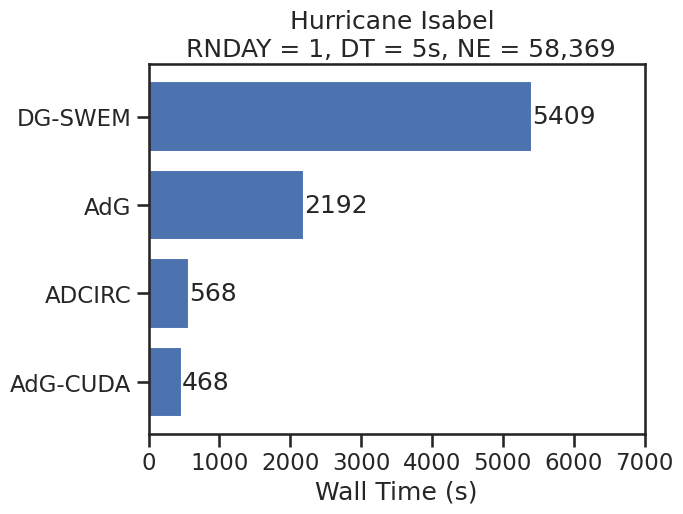

In [90]:
sns.set_style("ticks")
sns.set_palette("deep")
sns.set_context("talk")

fig, ax = plt.subplots()

# Example data
people = ('DG-SWEM', 'AdG', 'ADCIRC', 'AdG-CUDA')
y_pos = np.arange(len(people))
performance = [5409, 2192, 568, 468]


bars = ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people)
ax.bar_label(bars)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Wall Time (s)')
ax.set_xlim([0, 7000])
ax.set_title('Hurricane Isabel \n RNDAY = 1, DT = 5s, NE = 58,369')

plt.show()

In [91]:
fig.savefig('/workspace/Proposal/wall_time.jpg', bbox_inches='tight',dpi=300)

## Isabel, SHinnecock, Quarter annular CUDA

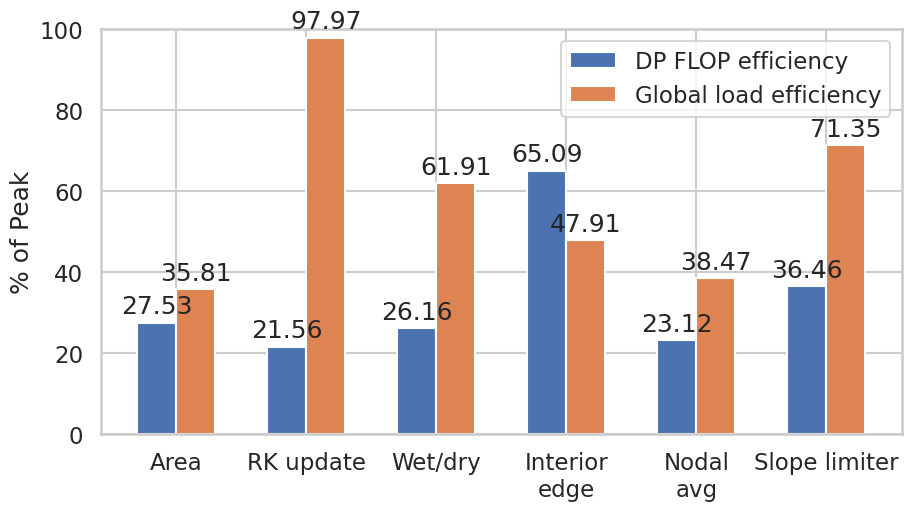

In [96]:

sns.set_style("whitegrid")
sns.set_palette("deep")
sns.set_context("talk")
species = ("Area",
           "RK update",
           "Wet/dry",
           "Interior\nedge",
           "Nodal\navg",
           "Slope limiter"
          )
penguin_means = {
    'DP FLOP efficiency': (27.53, 21.56, 26.16, 65.09, 23.12, 36.46),
    'Global load efficiency': (35.81, 97.97, 61.91, 47.91, 38.47, 71.35)
}

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(9,5))

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of Peak')
#ax.set_title('Penguin attributes by species')
ax.set_xticks(x+0.5*width, species)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 100)

plt.show()


In [97]:
fig.savefig('/workspace/Proposal/efficiency.jpg', transparent=True, bbox_inches='tight',dpi=300)